In [1]:
import numpy as np
import pandas as pd

In [2]:

# you can find the data in this website : https://www.kaggle.com/shivam2503/diamonds 

diamonds = pd.read_csv("diamonds.csv")

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>],
       [<AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

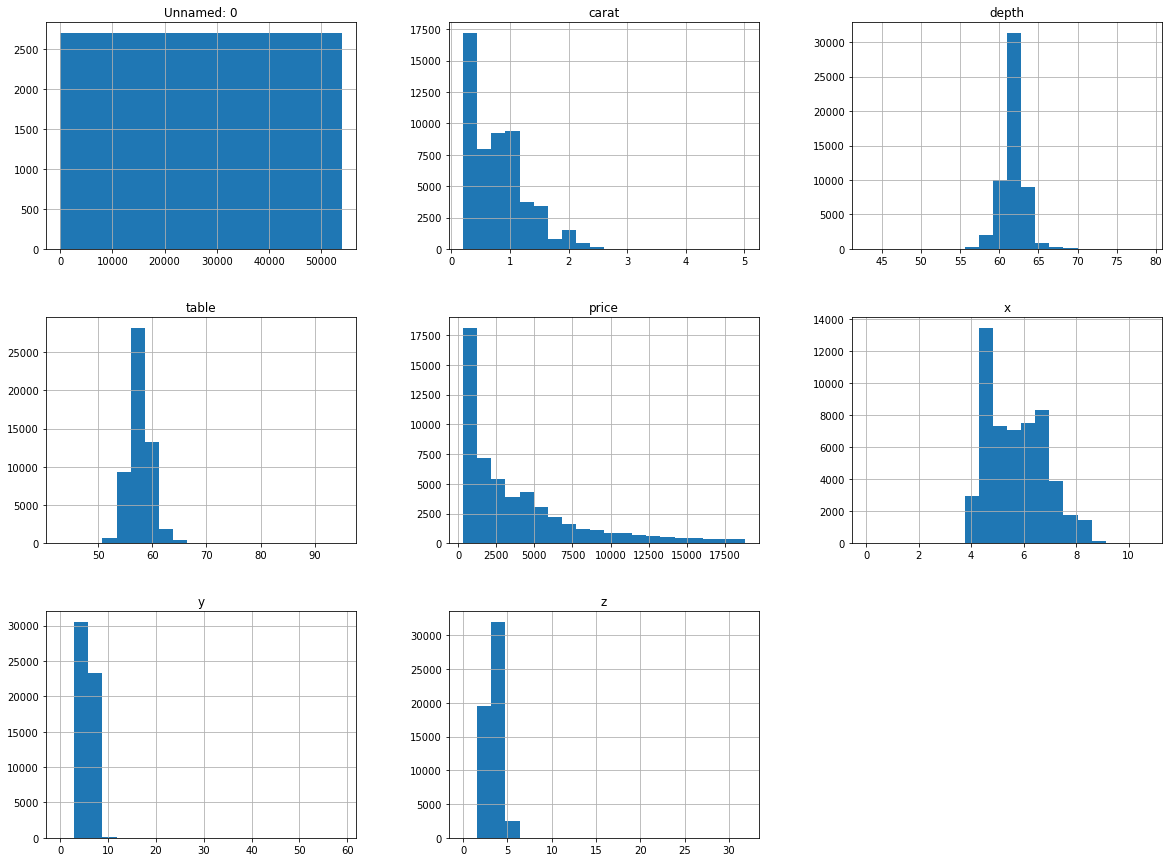

In [5]:
import matplotlib as plt
import seaborn as sns
diamonds.hist(figsize=(20,15),bins=20)

<AxesSubplot:>

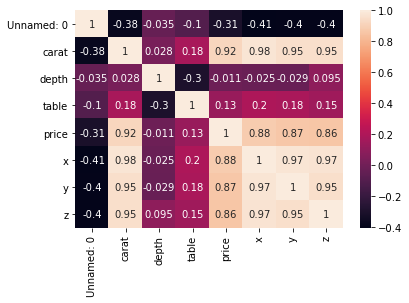

In [6]:
sns.heatmap(data=diamonds.corr(),annot=True)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>,
        <AxesSubplot:xlabel='z', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>,
        <AxesSubplot:xlabel='z', ylabel='x'>],
       [<AxesSubplot:xlabel='price', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='z', ylabel='y'>],
       [<AxesSubplot:xlabel='price', ylabel='z'>,
        <AxesSubplot:xlabel='x', ylabel='z'>,
        <AxesSubplot:xlabel='y', ylabel='z'>,
        <AxesSubplot:xlabel='z', ylabel='z'>]], dtype=object)

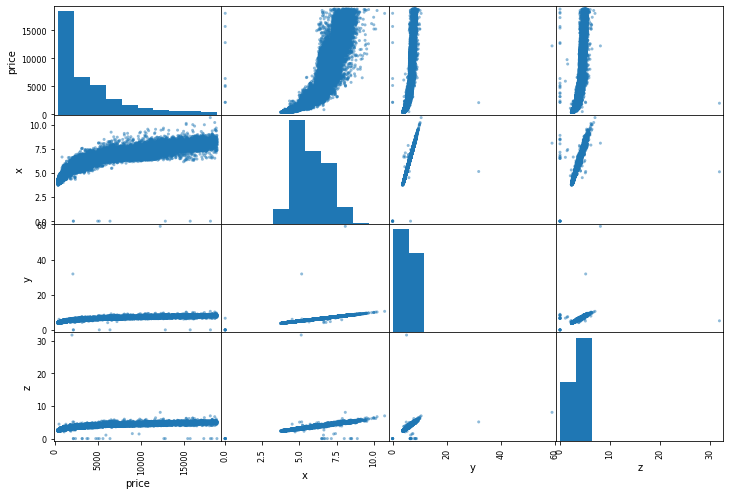

In [7]:
from pandas.plotting import scatter_matrix

att1=["price","x","y","z"]
scatter_matrix(diamonds[att1],figsize=(12, 8))

<AxesSubplot:>

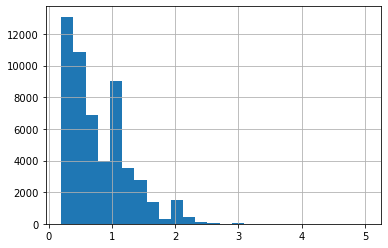

In [8]:
diamonds["carat"].hist(bins=25)


<AxesSubplot:xlabel='carat', ylabel='price'>

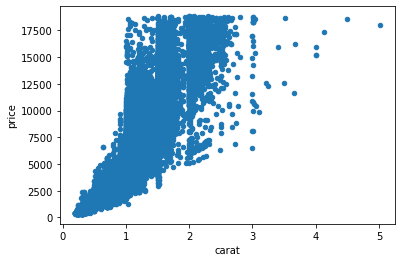

In [9]:
diamonds.plot(kind="scatter",x="carat",y="price")

In [10]:
def categorize(shimatta):
    shesmo1 = {'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1}
    shesmo2 = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
    shesmo3 = {'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1}
    shimatta.loc[:,'cut']=diamonds.loc[:,'cut'].map(shesmo1)
    shimatta.loc[:,'clarity']=diamonds.loc[:,'clarity'].map(shesmo3)
    shimatta.loc[:,'color']=diamonds.loc[:,'color'].map(shesmo2)
    return shimatta

def cleaning(data): 
    
    
    data=data.drop(data[data["z"]==0].index)
    data=data.drop(data[data["y"]==0].index)
    data=data.drop(data[data["x"]==0].index)
    
   
    
    if "Unnamed: 0" in data:
        data=data.drop(["Unnamed: 0"],axis=1)

    
    data = data[(data["depth"]<75)&(data["depth"]>45)]
    data = data[(data["table"]<80)&(data["table"]>40)]
    data = data[(data["x"]<30)]
    data = data[(data["y"]<30)]
    data = data[(data["z"]<30)&(data["z"]>2)]
    
    data["size"]=data["x"]*data["y"]*data["z"]*1/3
    data = data[(data["size"]<120)]
    dataf=data.drop(["x","y","z"],axis=1)

    
    if "carat" in diamonds:
        carat_log= np.log10(diamonds["carat"])
        dataf["carat_log"]=carat_log
        dataf.drop("carat",inplace=True,axis=1)
       
    return dataf

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
    ])





In [12]:
def prepare_data(data):
    data=cleaning(data)
    data=categorize(data)
    data_num=num_pipeline.fit_transform(data)
    return data
diamonds_prep=prepare_data(diamonds)
diamonds_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53452 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cut        53452 non-null  int64  
 1   color      53452 non-null  int64  
 2   clarity    53452 non-null  int64  
 3   depth      53452 non-null  float64
 4   table      53452 non-null  float64
 5   price      53452 non-null  int64  
 6   size       53452 non-null  float64
 7   carat_log  53452 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.7 MB


array([[<AxesSubplot:title={'center':'cut'}>,
        <AxesSubplot:title={'center':'color'}>,
        <AxesSubplot:title={'center':'clarity'}>],
       [<AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'carat_log'}>, <AxesSubplot:>]],
      dtype=object)

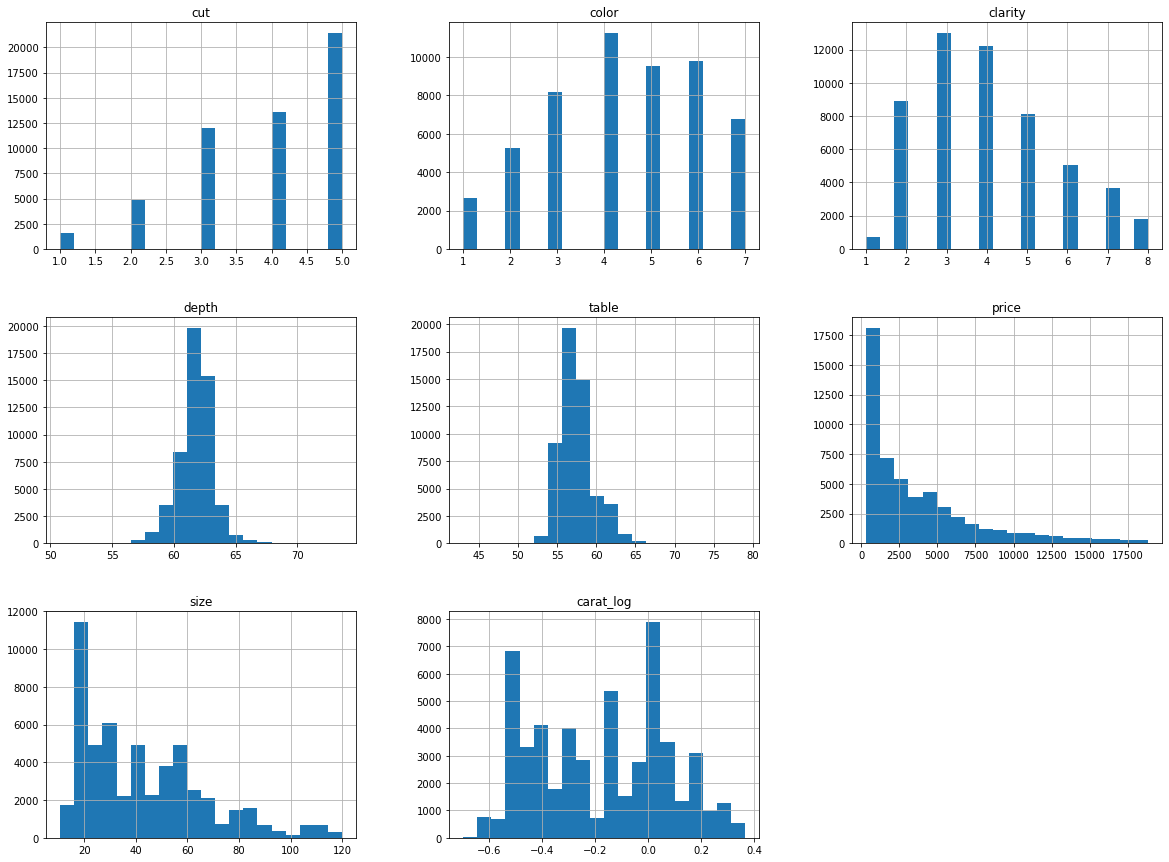

In [13]:
diamonds_prep.hist(figsize=(20,15),bins=20)

array([[<AxesSubplot:xlabel='color', ylabel='color'>,
        <AxesSubplot:xlabel='clarity', ylabel='color'>,
        <AxesSubplot:xlabel='cut', ylabel='color'>,
        <AxesSubplot:xlabel='price', ylabel='color'>],
       [<AxesSubplot:xlabel='color', ylabel='clarity'>,
        <AxesSubplot:xlabel='clarity', ylabel='clarity'>,
        <AxesSubplot:xlabel='cut', ylabel='clarity'>,
        <AxesSubplot:xlabel='price', ylabel='clarity'>],
       [<AxesSubplot:xlabel='color', ylabel='cut'>,
        <AxesSubplot:xlabel='clarity', ylabel='cut'>,
        <AxesSubplot:xlabel='cut', ylabel='cut'>,
        <AxesSubplot:xlabel='price', ylabel='cut'>],
       [<AxesSubplot:xlabel='color', ylabel='price'>,
        <AxesSubplot:xlabel='clarity', ylabel='price'>,
        <AxesSubplot:xlabel='cut', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

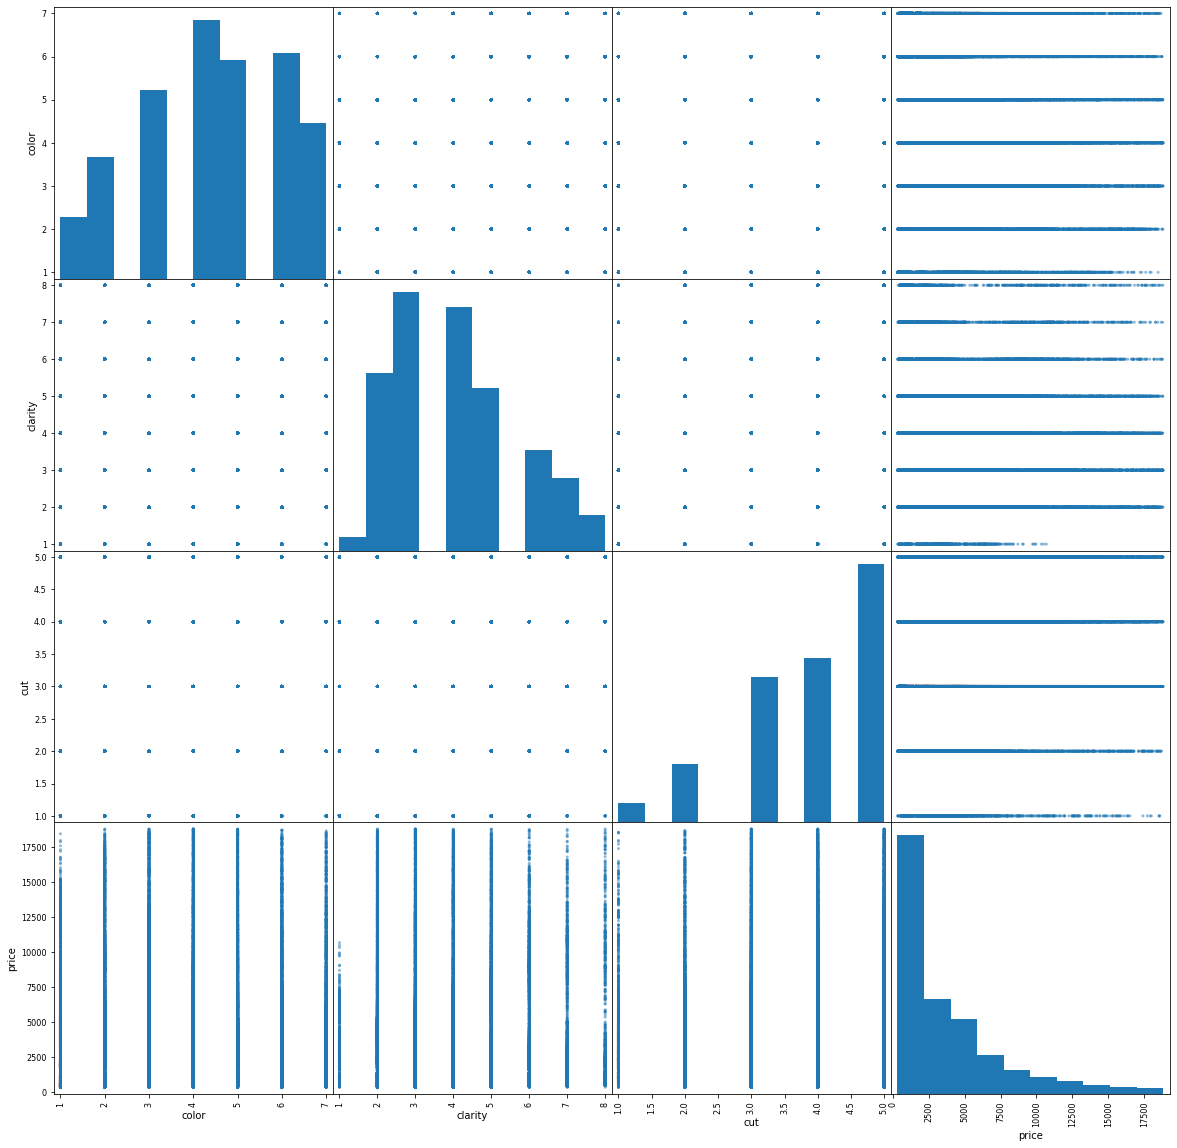

In [14]:
cat_attr=diamonds_prep[["color","clarity","cut","price"]]
scatter_matrix(cat_attr,figsize=(20,20),alpha =0.5)

<AxesSubplot:>

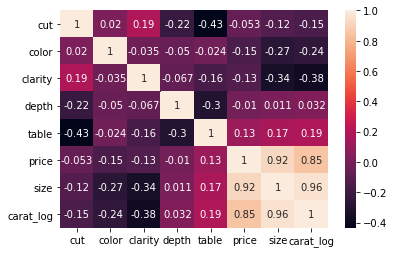

In [15]:
sns.heatmap(data=diamonds_prep.corr(),annot=True)

<AxesSubplot:xlabel='size', ylabel='price'>

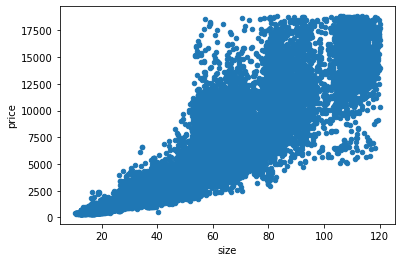

In [16]:
diamonds_prep.plot(kind="scatter",x="size",y="price")

<AxesSubplot:>

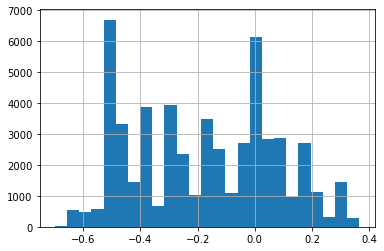

In [17]:
diamonds_prep["carat_log"].hist(bins=25)

<AxesSubplot:xlabel='carat_log', ylabel='price'>

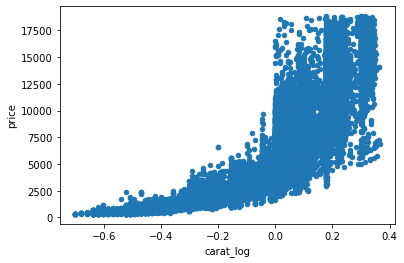

In [18]:
diamonds_prep.plot(kind="scatter",x="carat_log",y="price")

In [19]:
from sklearn.model_selection import train_test_split



diamonds_prep=prepare_data(diamonds)

train_set, test_set = train_test_split(diamonds_prep, test_size=0.2, random_state=42)


diamonds_train=train_set.drop("price",axis=1)
diamonds_price=train_set["price"].copy()


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='depth', ylabel='price'>,
        <AxesSubplot:xlabel='table', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='depth'>,
        <AxesSubplot:xlabel='depth', ylabel='depth'>,
        <AxesSubplot:xlabel='table', ylabel='depth'>],
       [<AxesSubplot:xlabel='price', ylabel='table'>,
        <AxesSubplot:xlabel='depth', ylabel='table'>,
        <AxesSubplot:xlabel='table', ylabel='table'>]], dtype=object)

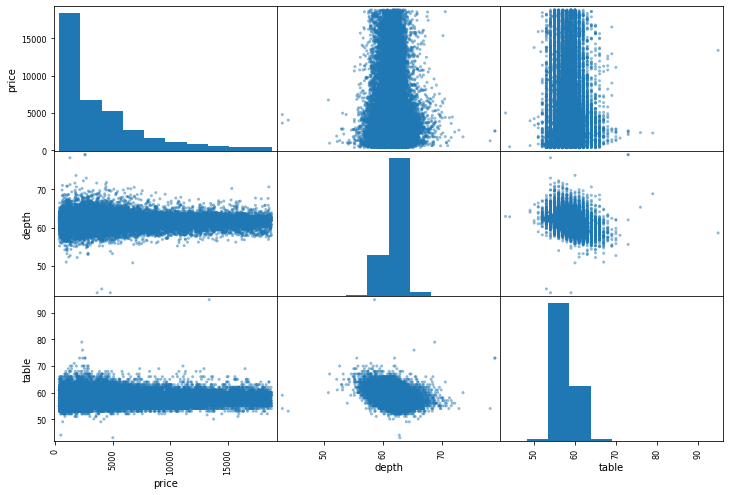

In [20]:
from pandas.plotting import scatter_matrix

att1=["price","depth","table"]
scatter_matrix(diamonds[att1],figsize=(12, 8))

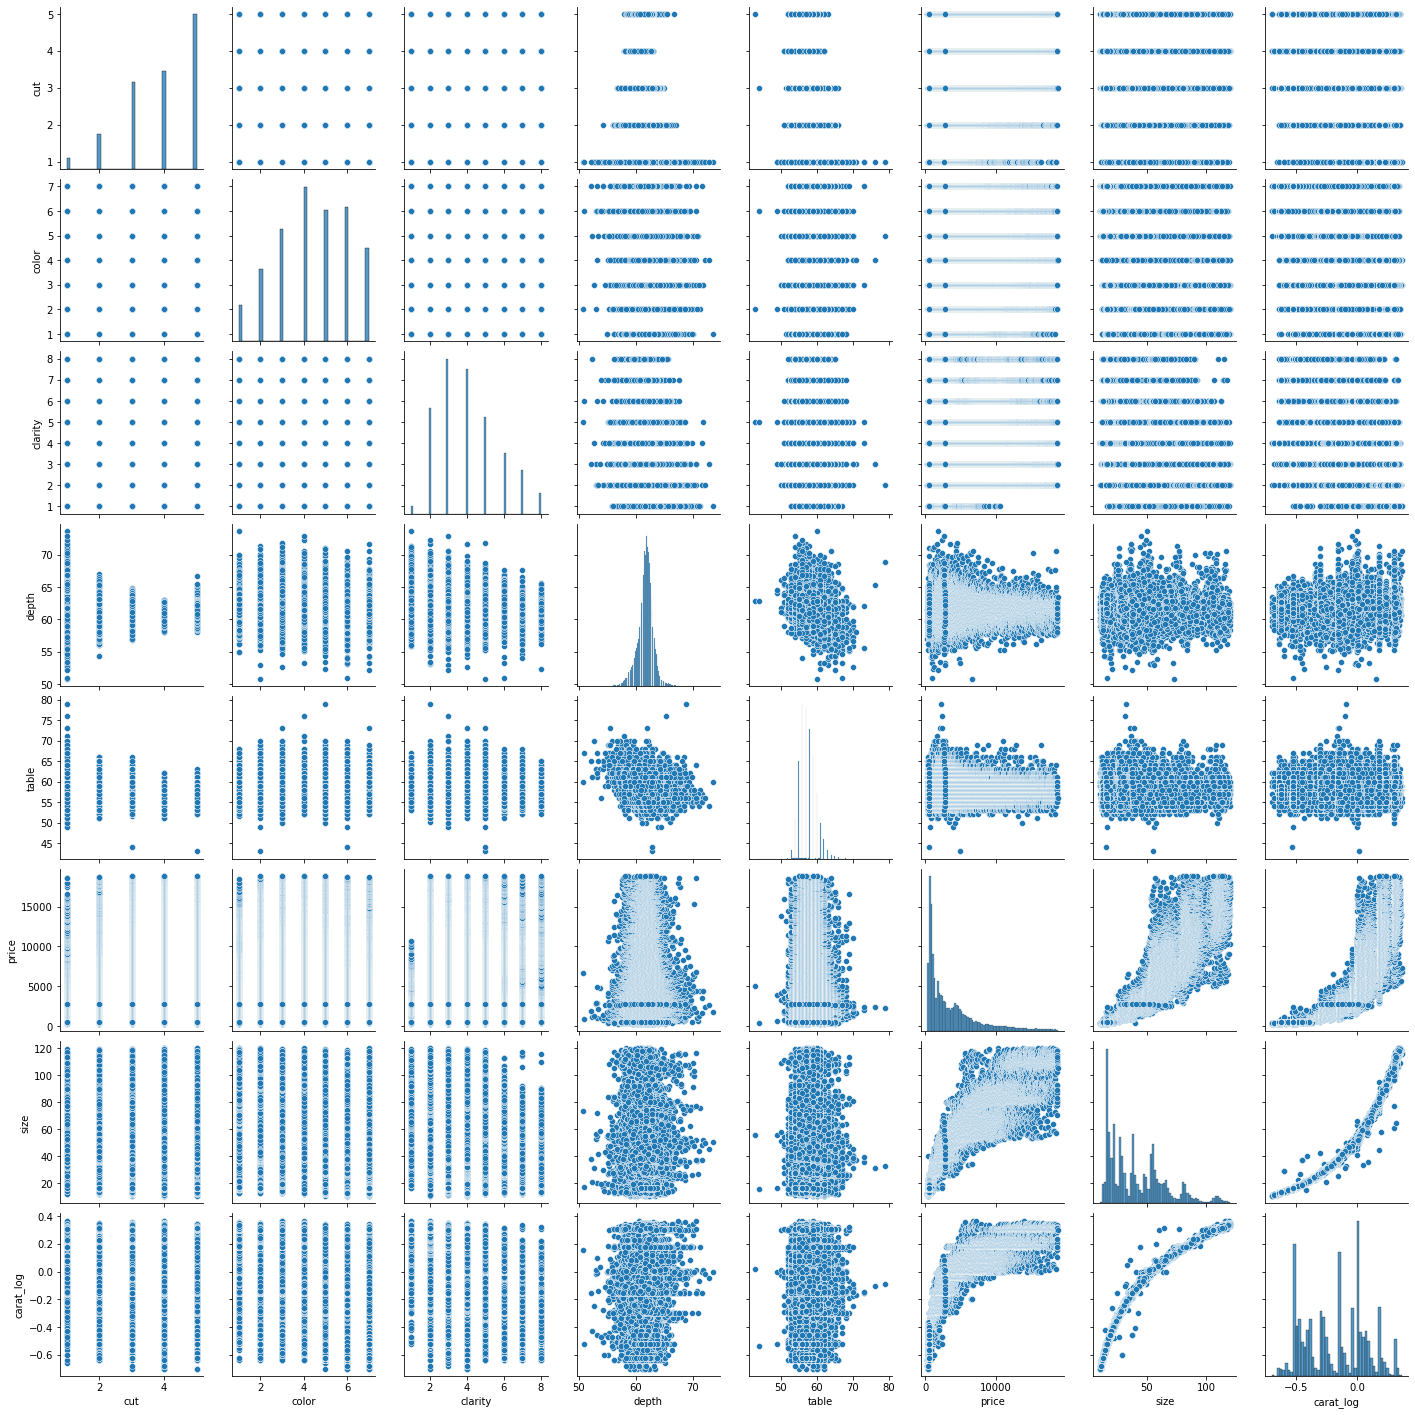

In [51]:
sns.pairplot(diamonds_prep)

In [21]:


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamonds_train, diamonds_price)



LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error

diamonds_prediction = lin_reg.predict(diamonds_train)
lin_rmse=mean_squared_error(diamonds_price,diamonds_prediction)
lin_rmse=np.sqrt(lin_rmse)
print("The root meen square error is: ",lin_rmse)

The root meen square error is:  1125.5026940087953


In [48]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg=DecisionTreeRegressor()
tree_reg.fit(diamonds_train,diamonds_price)

diamonds_prediction = tree_reg.predict(diamonds_train)
tree_rmse=mean_squared_error(diamonds_price,diamonds_prediction)
tree_rmse=np.sqrt(tree_rmse)
print("The root meen square error is: ",tree_rmse)


The root meen square error is:  33.31998723335585


In [47]:
from sklearn.ensemble import RandomForestRegressor
fors_reg=RandomForestRegressor()
fors_reg.fit(diamonds_train,diamonds_price)

diamonds_prediction = fors_reg.predict(diamonds_train)
fors_rmse=mean_squared_error(diamonds_price,diamonds_prediction)
fors_rmse=np.sqrt(fors_rmse)
print("The root meen square error is: ",fors_rmse)


The root meen square error is:  196.85506372460864


In [25]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):    
    print("scores mean :",scores.mean())
    print("scores std :",scores.std())
    print(scores)


In [26]:
lin_scores=cross_val_score(lin_reg,diamonds_train,diamonds_price,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores mean : 1125.1571786546083
scores std : 40.805982674335006
[1058.82693044 1099.73806945 1124.32658922 1156.2412335  1117.41321917
 1099.77949656 1217.61868351 1096.68255246 1133.20984305 1147.73516918]


In [27]:
tree_scores =cross_val_score(tree_reg,diamonds_train,diamonds_price,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores =np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

scores mean : 697.9269973232998
scores std : 33.847769839824124
[656.14689179 673.43121737 701.94893317 688.41311555 708.96762842
 692.03803811 784.64407205 689.21323486 667.86935769 716.59748422]


In [28]:
fors_reg_scores=cross_val_score(fors_reg,diamonds_train,diamonds_price,scoring="neg_mean_squared_error", cv=10)
fors_reg_rmse_scores=np.sqrt(-fors_reg_scores)
display_scores(fors_reg_rmse_scores)

scores mean : 524.8596822531786
scores std : 30.716270004965033
[511.60708636 503.26463026 531.02044346 509.66937537 536.69449277
 506.65969978 610.2944671  519.32904846 498.12687314 521.93070584]


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(diamonds_train, diamonds_price)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)

672.6344783820886 {'max_features': 2, 'n_estimators': 3}
579.7381814482269 {'max_features': 2, 'n_estimators': 10}
548.4703799788422 {'max_features': 2, 'n_estimators': 30}
607.0832406108036 {'max_features': 4, 'n_estimators': 3}
550.1253512872175 {'max_features': 4, 'n_estimators': 10}
529.9354737351987 {'max_features': 4, 'n_estimators': 30}
611.4440869494431 {'max_features': 6, 'n_estimators': 3}
551.1213637660094 {'max_features': 6, 'n_estimators': 10}
537.1783333452116 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
668.9606596293037 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
570.7146498017906 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
608.8901398966093 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
554.7127841032504 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
607.570082375648 {'bootstrap': False, 'm

In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.003084  , 0.03522323, 0.06359109, 0.00640892, 0.00367715,
       0.47232554, 0.41569007])

In [32]:
attributes=diamonds_train.columns
sorted(zip(feature_importances, attributes), reverse=True)


[(0.47232554078118133, 'size'),
 (0.4156900715797916, 'carat_log'),
 (0.0635910875865242, 'clarity'),
 (0.035223228249156156, 'color'),
 (0.006408916488315302, 'depth'),
 (0.003677154781405376, 'table'),
 (0.003084000533625978, 'cut')]

In [33]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()


In [34]:
final_predictions = final_model.predict(X_test)


In [35]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

495.28874674309867

In [36]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([474.65819123, 515.09366798])

In [37]:
'''import joblib


liner_model = 'noNorm_linear.sav'
joblib.dump(lin_reg, liner_model)

dis_tree = 'noNorm_tree.sav'
joblib.dump(tree_reg, dis_tree)

fors_reg = 'noNorm_forest.sav'
joblib.dump(fors_reg, fors_reg)
'''

"import joblib\n\n\nliner_model = 'noNorm_linear.sav'\njoblib.dump(lin_reg, liner_model)\n\ndis_tree = 'noNorm_tree.sav'\njoblib.dump(tree_reg, dis_tree)\n\nfors_reg = 'noNorm_forest.sav'\njoblib.dump(fors_reg, fors_reg)\n"